In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2

import seaborn as sns

In [291]:
df = pd.read_csv('csv_files/Emotion_in_everyday_life_open.csv')

In [292]:
df.head(4)

,id,Hours,Day,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,...,Alertness,Anxiety,Disdain,Ofense,Guilt,Disgust,Fear,Embarassment,Sadness,Anger
0,1,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,14,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,14,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,14,4,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [293]:
df.columns

Index(['id', 'Hours', 'Day', 'Pride', 'Love', 'Hope', 'Gratitude', 'Joy',
       'Satisfaction', 'Awe', 'Amusement', 'Alertness', 'Anxiety', 'Disdain',
       'Ofense', 'Guilt', 'Disgust', 'Fear', 'Embarassment', 'Sadness',
       'Anger'],
      dtype='object')

## 1. Data cleaning

In [105]:
df['Day'].unique()

array(['3', '1', '2', '4', '5', '7', '6', ' '], dtype=object)

In [294]:
df['Day'] = pd.to_numeric(df['Day'], errors='coerce')

In [295]:
df['Hours'] = pd.to_numeric(df['Hours'], errors='coerce')

In [296]:
df['Day'].isna().sum(), df['Hours'].isna().sum()

(31, 31)

In [257]:
# df['Formatted_Hours'] = pd.to_datetime(df['Hours'], format='%H').dt.strftime('%I:%M %p')

In [100]:
#df['New_Column'] = pd.to_datetime(df['Formatted_Hours'], format='%I:%M %p').dt.time

In [297]:
emotion_cols = ['Pride', 'Love', 'Hope', 'Gratitude', 'Joy', 'Satisfaction', 'Awe', 'Amusement', 'Alertness', 'Anxiety', 'Disdain',
                'Ofense', 'Guilt', 'Disgust', 'Fear', 'Embarassment', 'Sadness', 'Anger']

In [298]:
for col in emotion_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [299]:
df.dtypes

id                int64
Hours           float64
Day             float64
Pride           float64
Love            float64
Hope            float64
Gratitude       float64
Joy             float64
Satisfaction    float64
Awe             float64
Amusement       float64
Alertness       float64
Anxiety         float64
Disdain         float64
Ofense          float64
Guilt           float64
Disgust         float64
Fear            float64
Embarassment    float64
Sadness         float64
Anger           float64
dtype: object

In [300]:
df['Hours'].value_counts(dropna=False)

Hours
19.0    5180
11.0    4893
12.0    4883
20.0    4753
16.0    4668
18.0    4564
15.0    4493
17.0    4429
9.0     4373
10.0    4276
13.0    4070
14.0    3970
8.0     3901
7.0     3093
21.0    2695
6.0     1529
22.0    1472
23.0     688
5.0      592
0.0      339
4.0      214
1.0      188
3.0      135
2.0      115
NaN       31
Name: count, dtype: int64

In [301]:
df = df.dropna(subset=['Hours'])

 - changing type of columns to numeric
 - checking for null vlues after that - 31 rows
 - there are 31 rows with Nan values - drop them - only few comparing to size of data set
 
 
 - initial size of the data set  (69544, 21)

In [302]:
df.isna().sum()

id                 0
Hours              0
Day                0
Pride              0
Love               5
Hope               5
Gratitude          5
Joy                5
Satisfaction       5
Awe                5
Amusement          5
Alertness          5
Anxiety         1199
Disdain         1199
Ofense          1199
Guilt           1199
Disgust         1199
Fear            1199
Embarassment    1199
Sadness         1199
Anger           1199
dtype: int64

In [303]:
df = df.dropna()

In [304]:
df.shape

(68311, 21)

Text(0, 0.5, 'Count')

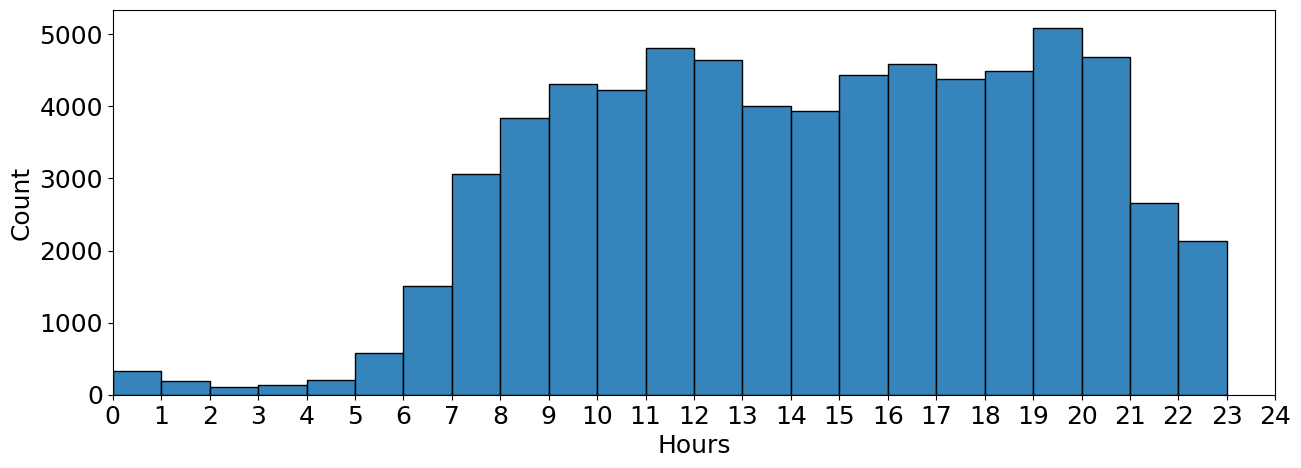

In [621]:
plt.figure(figsize=(15, 5))
sns.histplot(x=df['Hours'], bins = 23, alpha=0.9)
plt.xticks(range(25))
plt.xlim(0, 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Count', fontsize=18)
# days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# ordered_bad_emotions_day_freq.plot(kind='barh', ax= ax4, alpha=0.9, stacked=True, width=0.8)  
# plt.title('Proportion of Bad Emotions Per Day of the Week', fontsize=20)


# plt.yticks(range(len(days_of_week)), days_of_week, fontsize=18)

# plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=1)

# plt.savefig('proportion_bad_emotions_peer_day_plot.png', bbox_inches='tight')

# plt.gca().invert_yaxis()

(0.6, 7.4)

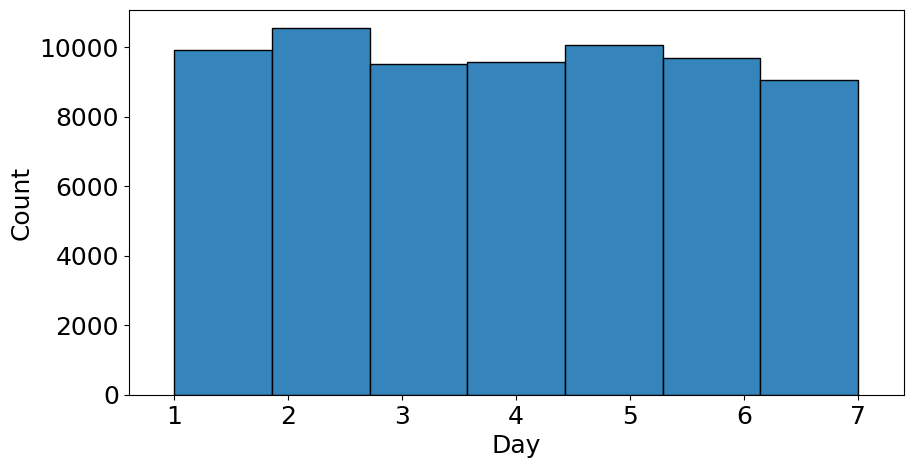

In [641]:
#days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
plt.figure(figsize=(10, 5))
sns.histplot(x=df['Day'], bins =7, alpha=0.9)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Count', fontsize=18)
#plt.xticks(range(len(days_of_week)), days_of_week, fontsize=18)
#plt.xticks(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0.6, 7.4)

In [141]:
df.isna().sum()

id                    0
Hours                 0
Day                   0
Pride                 0
Love                  5
Hope                  5
Gratitude             5
Joy                   5
Satisfaction          5
Awe                   5
Amusement             5
Alertness             5
Anxiety            1199
Disdain            1199
Ofense             1199
Guilt              1199
Disgust            1199
Fear               1199
Embarassment       1199
Sadness            1199
Anger              1199
Formatted_Hours       0
dtype: int64

## Statictics on emotions

In [275]:
emotion_cols = ['Pride', 'Love', 'Hope', 'Gratitude', 'Joy', 'Satisfaction', 'Awe', 'Amusement', 'Alertness', 'Anxiety', 'Disdain',
                'Ofense', 'Guilt', 'Disgust', 'Fear', 'Embarassment', 'Sadness', 'Anger']

In [276]:
good = ['Pride', 'Love', 'Hope', 'Gratitude', 'Joy', 'Satisfaction', 'Awe', 'Amusement', 'Alertness']
        
bad = ['Anxiety', 'Disdain', 'Ofense', 'Guilt', 'Disgust', 'Fear', 'Embarassment', 'Sadness', 'Anger']

In [277]:
df[good].describe()

,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness
count,68311.000000,68311.000000,68311.00000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000
mean,0.133463,0.269327,0.24144,0.107479,0.339843,0.272445,0.055350,0.160750,0.259094
std,0.340077,0.443613,0.42796,0.309724,0.473659,0.445221,0.228663,0.367303,0.438141
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [278]:
stats_good = {}

for col in good:
    stats_good[col] = df[col].sum()
    print(col, df[col].sum())

Pride 9117.0
Love 18398.0
Hope 16493.0
Gratitude 7342.0
Joy 23215.0
Satisfaction 18611.0
Awe 3781.0
Amusement 10981.0
Alertness 17699.0


In [279]:
emotions_stat = {}

for col in emotion_cols:
    emotions_stat[col] = df[col].sum()
    #print(col, df[col].sum())

In [192]:
stats = pd.DataFrame(list(emotions_stat.items()), columns=['Emotion', 'Count'])

In [197]:
stats = stats.set_index('Emotion').T

In [218]:
stats

Emotion,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness,Anxiety,Disdain,Ofense,Guilt,Disgust,Fear,Embarassment,Sadness,Anger
Count,9117.0,18398.0,16493.0,7342.0,23215.0,18611.0,3781.0,10981.0,17699.0,19108.0,682.0,3157.0,3500.0,7408.0,3455.0,2996.0,13454.0,6391.0


In [202]:
stats.T['Count'].sum()

185788.0

In [642]:
total = 0 
for col in stats:
    total = total + stats[col]

In [643]:
total[0]

185788.0

In [208]:
stats

Emotion,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness,Anxiety,Disdain,Ofense,Guilt,Disgust,Fear,Embarassment,Sadness,Anger
Count,9117.0,18398.0,16493.0,7342.0,23215.0,18611.0,3781.0,10981.0,17699.0,19108.0,682.0,3157.0,3500.0,7408.0,3455.0,2996.0,13454.0,6391.0


In [ ]:
# df_2.loc[len(df_2)] = new_raw

In [213]:
stats['Pride'][0]

9117.0

In [216]:
percentage = [] 

for col in stats:
    percentage.append(stats[col][0] / total[0] *100)

percentage

[4.907206062824295,
 9.902684780502508,
 8.877322539668869,
 3.951816048399251,
 12.49542489288867,
 10.017331582233513,
 2.0351152926992055,
 5.910500139944453,
 9.526449501582448,
 10.284840786272525,
 0.36708506469739705,
 1.699248605937951,
 1.8838676340775506,
 3.987340409498999,
 1.859646478782268,
 1.6125906947703834,
 7.2415871853941045,
 3.4399422998256073]

In [225]:
df.groupby(['Day', 'Hours'])['Pride'].agg(sum)

Day  Hours
1.0  0.0      10.0
     1.0       6.0
     2.0       3.0
     3.0       4.0
     4.0       8.0
              ... 
7.0  19.0     97.0
     20.0     77.0
     21.0     50.0
     22.0     22.0
     23.0     21.0
Name: Pride, Length: 168, dtype: float64

In [237]:
suma = df[['Day','Pride', 'Love', 'Hope', 'Gratitude', 'Joy', 'Satisfaction', 'Awe', 'Amusement', 'Alertness']].groupby('Day').sum()

In [238]:
wszystkie = df[['Day','Pride', 'Love', 'Hope', 'Gratitude', 'Joy', 'Satisfaction', 'Awe', 'Amusement', 'Alertness']].groupby('Day').count()

In [242]:
wszystkie.head(3)

,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness
Day,,,,,,,,,
1.0,9905,9905,9905,9905,9905,9905,9905,9905,9905
2.0,10544,10544,10544,10544,10544,10544,10544,10544,10544
3.0,9497,9497,9497,9497,9497,9497,9497,9497,9497


In [241]:
suma.head(3)

,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness
Day,,,,,,,,,
1.0,1249.0,2878.0,2233.0,1117.0,3552.0,2713.0,584.0,1577.0,2297.0
2.0,1348.0,2902.0,2568.0,1028.0,3388.0,2771.0,544.0,1576.0,2850.0
3.0,1297.0,2422.0,2327.0,1013.0,3048.0,2588.0,498.0,1468.0,2582.0


In [239]:
wszystkie - suma

,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness
Day,,,,,,,,,
1.0,8656.0,7027.0,7672.0,8788.0,6353.0,7192.0,9321.0,8328.0,7608.0
2.0,9196.0,7642.0,7976.0,9516.0,7156.0,7773.0,10000.0,8968.0,7694.0
3.0,8200.0,7075.0,7170.0,8484.0,6449.0,6909.0,8999.0,8029.0,6915.0
4.0,8339.0,7042.0,7149.0,8547.0,6444.0,7044.0,9028.0,8080.0,6925.0
5.0,8731.0,7493.0,7623.0,9004.0,6891.0,7341.0,9528.0,8490.0,7343.0
6.0,8352.0,7207.0,7320.0,8647.0,6222.0,7028.0,9185.0,8037.0,7206.0
7.0,7720.0,6427.0,6908.0,7983.0,5581.0,6413.0,8469.0,7398.0,6921.0


In [312]:
# df[['Hours', 'Pride', 'Love', 'Hope', 'Gratitude', 'Joy', 'Satisfaction', 'Awe', 'Amusement', 'Alertness']].groupby('Hours').sum()

In [309]:
df.to_csv('csv_files/cleaned_data_everyday.csv', index=False)

In [249]:
#df.to_excel('cleaned_data_everyday.xlsx', index=False)

In [310]:
df = pd.read_csv('csv_files/cleaned_data_everyday.csv')

In [311]:
df

,id,Hours,Day,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,...,Alertness,Anxiety,Disdain,Ofense,Guilt,Disgust,Fear,Embarassment,Sadness,Anger
0,1,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,14.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68306,69539,11.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68307,69540,14.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68308,69541,5.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68309,69542,18.0,7.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
df_reduced  = df[(df['Hours'] >= 6 )& (df['Hours'] < 24)]

(5.0, 24.0)

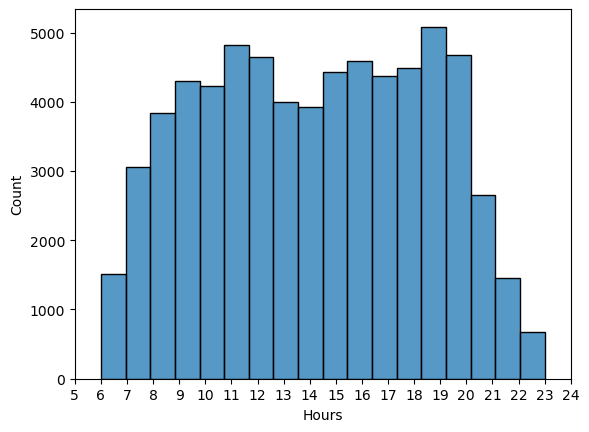

In [551]:
#plt.figure(figsize=(15, 5))
sns.histplot(x=df_reduced['Hours'], bins = 18)
plt.xticks(range(25))
plt.xlim(5, 24)

In [322]:
df_reduced.columns

Index(['id', 'Hours', 'Day', 'Pride', 'Love', 'Hope', 'Gratitude', 'Joy',
       'Satisfaction', 'Awe', 'Amusement', 'Alertness', 'Anxiety', 'Disdain',
       'Ofense', 'Guilt', 'Disgust', 'Fear', 'Embarassment', 'Sadness',
       'Anger'],
      dtype='object')

In [332]:
# round(df[emotion_cols].mean().sort_values(ascending=False), 2)*100

In [644]:
top_emotions = round(df_reduced[emotion_cols].mean().sort_values(ascending=False), 2)*100

In [673]:
top_emotions

Joy             34.0
Anxiety         28.0
Satisfaction    27.0
Love            27.0
Alertness       26.0
Hope            24.0
Sadness         20.0
Amusement       16.0
Pride           13.0
Disgust         11.0
Gratitude       11.0
Anger            9.0
Awe              6.0
Guilt            5.0
Fear             5.0
Ofense           5.0
Embarassment     4.0
Disdain          1.0
dtype: float64

<Figure size 1000x500 with 0 Axes>

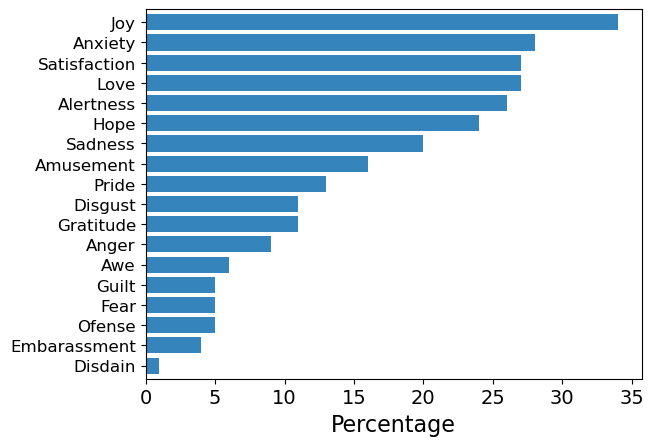

In [672]:
#fig5, ax5 = plt.subplots(figsize=(10, 10)) 
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
plt.figure(figsize=(10, 5))
pd.DataFrame(top_emotions).plot(kind='barh', legend=None, alpha=0.9, width=0.8, color = custom_colors)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Percentage', fontsize=16)
plt.gca().invert_yaxis()  # Invert the y-axis for a top-down representation
plt.show()


In [334]:
hourly_emotion_counts = df_reduced.groupby('Hours')[emotion_cols].sum()

In [335]:
hourly_emotion_counts

,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness,Anxiety,Disdain,Ofense,Guilt,Disgust,Fear,Embarassment,Sadness,Anger
Hours,,,,,,,,,,,,,,,,,,
6.0,185.0,371.0,410.0,187.0,446.0,359.0,66.0,166.0,322.0,439.0,14.0,63.0,98.0,147.0,74.0,59.0,290.0,138.0
7.0,379.0,800.0,767.0,309.0,921.0,701.0,118.0,368.0,714.0,872.0,26.0,138.0,169.0,310.0,165.0,124.0,592.0,270.0
8.0,463.0,945.0,919.0,422.0,1131.0,883.0,176.0,454.0,1000.0,1071.0,27.0,164.0,169.0,373.0,199.0,162.0,739.0,362.0
9.0,521.0,1088.0,1011.0,399.0,1312.0,1126.0,219.0,543.0,1220.0,1187.0,45.0,194.0,216.0,500.0,200.0,179.0,823.0,369.0
10.0,590.0,1064.0,1037.0,423.0,1386.0,1069.0,216.0,650.0,1166.0,1189.0,42.0,205.0,225.0,461.0,225.0,210.0,832.0,437.0
11.0,626.0,1287.0,1197.0,524.0,1672.0,1389.0,266.0,737.0,1250.0,1388.0,42.0,187.0,234.0,499.0,235.0,214.0,920.0,440.0
12.0,588.0,1161.0,1093.0,454.0,1585.0,1280.0,243.0,735.0,1233.0,1310.0,45.0,205.0,221.0,523.0,223.0,218.0,899.0,441.0
13.0,537.0,1039.0,980.0,437.0,1385.0,1097.0,238.0,698.0,1160.0,1110.0,32.0,167.0,165.0,413.0,203.0,160.0,758.0,354.0
14.0,530.0,1011.0,959.0,441.0,1331.0,1079.0,215.0,637.0,1139.0,1056.0,43.0,176.0,187.0,411.0,207.0,163.0,764.0,390.0


In [336]:
hourly_sum = hourly_emotion_counts.sum(axis=1)

In [374]:
hourly_emotion_percentages = hourly_emotion_counts / hourly_sum.values[:, None] *100

In [386]:
hourly_emotion_percentages

,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness,Anxiety,Disdain,Ofense,Guilt,Disgust,Fear,Embarassment,Sadness,Anger
Hours,,,,,,,,,,,,,,,,,,
6.0,4.825248,9.676578,10.693792,4.877413,11.632760,9.363589,1.721440,4.329682,8.398539,11.450183,0.365154,1.643192,2.556077,3.834116,1.930099,1.538863,7.563902,3.599374
7.0,4.894744,10.331913,9.905721,3.990701,11.894614,9.053338,1.523957,4.752680,9.221232,11.261785,0.335787,1.782255,2.182617,4.003616,2.130957,1.601446,7.645615,3.487021
8.0,4.793457,9.783621,9.514442,4.368982,11.709287,9.141733,1.822135,4.700280,10.353039,11.088104,0.279532,1.697898,1.749664,3.861683,2.060255,1.677192,7.650896,3.747800
9.0,4.671808,9.756098,9.065638,3.577834,11.764706,10.096844,1.963773,4.869082,10.939742,10.643831,0.403515,1.739598,1.936872,4.483501,1.793400,1.605093,7.379842,3.308824
10.0,5.163210,9.311280,9.074998,3.701759,12.129168,9.355036,1.890260,5.688282,10.203903,10.405181,0.367551,1.793997,1.969021,4.034305,1.969021,1.837753,7.281001,3.824276
11.0,4.776074,9.819181,9.132525,3.997864,12.756542,10.597391,2.029450,5.622950,9.536889,10.589761,0.320439,1.426719,1.785306,3.807126,1.792935,1.632715,7.019150,3.356985
12.0,4.720238,9.320061,8.774183,3.644537,12.723770,10.275347,1.950710,5.900297,9.898049,10.516176,0.361243,1.645661,1.774103,4.198443,1.790158,1.750020,7.216826,3.540178
13.0,4.911735,9.503339,8.963688,3.997073,12.668069,10.033842,2.176896,6.384341,10.610080,10.152749,0.292692,1.527486,1.509192,3.777554,1.856764,1.463459,6.933138,3.237904
14.0,4.935283,9.414284,8.930068,4.106528,12.394078,10.047490,2.002049,5.931651,10.606202,9.833318,0.400410,1.638886,1.741317,3.827172,1.927554,1.517832,7.114256,3.631623


## Figures in a loop

In [555]:
# fig, axes = plt.subplots(nrows=len(emotion_cols), ncols=1, figsize=(8, 2 * len(emotion_cols)))

# # Iterate over emotions
# for i, emotion in enumerate(emotion_cols):
#     # Plot percentage for the current emotion
#     axes[i].bar(hourly_emotion_percentages.index, hourly_emotion_percentages[emotion], color='skyblue')
#     axes[i].set_title(emotion)
#     axes[i].set_xlabel('Hour')
#     axes[i].set_xlim(5, 24)
#     axes[i].set_ylabel('Percentage')
#     axes[i].set_ylim(0, 15)

# # Adjust layout
# plt.tight_layout()
# plt.show()

## Some other plots

In [399]:
hourly_emotion_percentages[good].head(5)

,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness
Hours,,,,,,,,,
6.0,4.825248,9.676578,10.693792,4.877413,11.632760,9.363589,1.721440,4.329682,8.398539
7.0,4.894744,10.331913,9.905721,3.990701,11.894614,9.053338,1.523957,4.752680,9.221232
8.0,4.793457,9.783621,9.514442,4.368982,11.709287,9.141733,1.822135,4.700280,10.353039
9.0,4.671808,9.756098,9.065638,3.577834,11.764706,10.096844,1.963773,4.869082,10.939742
10.0,5.163210,9.311280,9.074998,3.701759,12.129168,9.355036,1.890260,5.688282,10.203903


In [400]:
hourly_emotion_percentages[bad].head(5)

,Anxiety,Disdain,Ofense,Guilt,Disgust,Fear,Embarassment,Sadness,Anger
Hours,,,,,,,,,
6.0,11.450183,0.365154,1.643192,2.556077,3.834116,1.930099,1.538863,7.563902,3.599374
7.0,11.261785,0.335787,1.782255,2.182617,4.003616,2.130957,1.601446,7.645615,3.487021
8.0,11.088104,0.279532,1.697898,1.749664,3.861683,2.060255,1.677192,7.650896,3.747800
9.0,10.643831,0.403515,1.739598,1.936872,4.483501,1.793400,1.605093,7.379842,3.308824
10.0,10.405181,0.367551,1.793997,1.969021,4.034305,1.969021,1.837753,7.281001,3.824276


In [418]:
all_good_sum = []

for i in hourly_emotion_percentages[good].index:
    all_good_sum.append(hourly_emotion_percentages[good].loc[i].sum())
    #print(hourly_emotion_percentages[good].loc[i].sum())

In [415]:
# all_good_sum

In [180]:
stats_good

{'Pride': 9117.0,
 'Love': 18398.0,
 'Hope': 16493.0,
 'Gratitude': 7342.0,
 'Joy': 23215.0,
 'Satisfaction': 18611.0,
 'Awe': 3781.0,
 'Amusement': 10981.0,
 'Alertness': 17699.0}

In [417]:
all_bad_sum = []
for i in hourly_emotion_percentages[bad].index:
    all_bad_sum.append(hourly_emotion_percentages[bad].loc[i].sum())
    #print(hourly_emotion_percentages[bad].loc[i].sum())

In [429]:
good_bad_hourly_percentage = pd.DataFrame({'good' : all_good_sum, 'bad': all_bad_sum}, index=hourly_emotion_percentages.index) 

In [430]:
good_bad_hourly_percentage

,good,bad
Hours,,
6.0,65.519040,34.480960
7.0,65.568901,34.431099
8.0,66.186976,33.813024
9.0,66.705524,33.294476
10.0,66.517896,33.482104
11.0,68.268864,31.731136
12.0,67.207193,32.792807
13.0,69.249062,30.750938
14.0,68.367632,31.632368


In [456]:
good_bad_hourly_percentage.index = good_bad_hourly_percentage.index.astype(int)

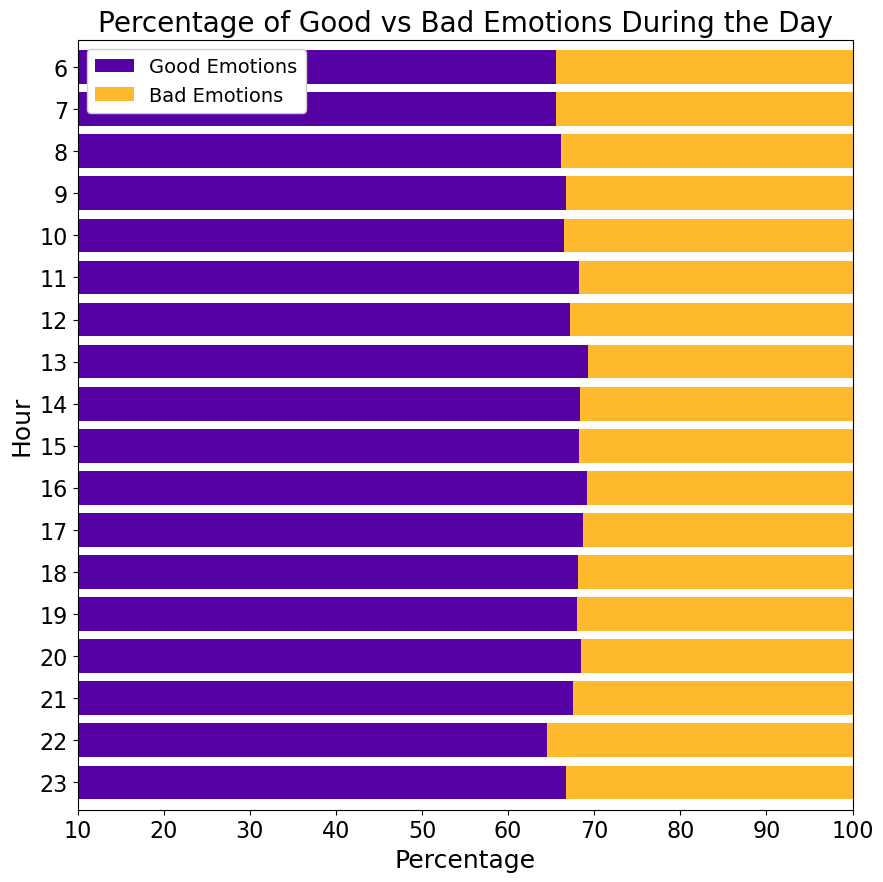

In [575]:
fig, ax = plt.subplots(figsize=(10, 10)) 
colors =  plt.cm.plasma([0.15, 0.85])  #plt.cm.coolwarm([0.2, 0.8])#plt.cm.cividis([0.2, 0.8]) ##['#66c2a5', '#fc8d62'] #plt.cm.viridis([0.2, 0.8])

good_bad_hourly_percentage[['good', 'bad']].plot(kind='barh', stacked=True, ax=ax, width=0.8,  color=colors)
plt.title('Percentage of Good vs Bad Emotions During the Day',  fontsize=20)
plt.xlabel('Percentage',  fontsize=18)
plt.xlim(10, 100)
plt.ylabel('Hour',  fontsize=18)
plt.legend(['Good Emotions', 'Bad Emotions'], fontsize=14, loc='upper left', framealpha=1)

# Increase font size for ticks
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Show the plot
plt.gca().invert_yaxis()
#plt.savefig('good_bad_emotions_plot.png', bbox_inches='tight')
#plt.show()

<Figure size 640x480 with 0 Axes>

##  Emotions per Weekday

In [491]:
day_emotion_counts = df_reduced.groupby('Day')[emotion_cols].sum()

In [492]:
day_emotion_counts

,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness,Anxiety,Disdain,Ofense,Guilt,Disgust,Fear,Embarassment,Sadness,Anger
Day,,,,,,,,,,,,,,,,,,
1.0,1214.0,2823.0,2191.0,1082.0,3470.0,2645.0,569.0,1533.0,2273.0,2577.0,88.0,449.0,486.0,1018.0,472.0,406.0,1984.0,876.0
2.0,1315.0,2837.0,2509.0,1004.0,3333.0,2718.0,531.0,1552.0,2810.0,3032.0,88.0,464.0,537.0,1097.0,538.0,445.0,2036.0,943.0
3.0,1269.0,2365.0,2269.0,989.0,2986.0,2531.0,493.0,1445.0,2526.0,2658.0,106.0,472.0,460.0,1092.0,505.0,379.0,1779.0,851.0
4.0,1201.0,2485.0,2352.0,991.0,3060.0,2469.0,530.0,1463.0,2591.0,2715.0,89.0,430.0,477.0,999.0,493.0,414.0,1816.0,913.0
5.0,1315.0,2515.0,2392.0,1039.0,3107.0,2682.0,532.0,1550.0,2679.0,2803.0,96.0,439.0,534.0,1104.0,482.0,452.0,1946.0,975.0
6.0,1294.0,2421.0,2305.0,1013.0,3387.0,2605.0,491.0,1615.0,2424.0,2583.0,97.0,423.0,478.0,1025.0,469.0,423.0,1813.0,910.0
7.0,1293.0,2554.0,2078.0,1024.0,3380.0,2561.0,558.0,1605.0,2084.0,2279.0,96.0,390.0,421.0,874.0,400.0,385.0,1743.0,793.0


In [522]:
day_emotion_counts

,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness,Anxiety,Disdain,Ofense,Guilt,Disgust,Fear,Embarassment,Sadness,Anger
Day,,,,,,,,,,,,,,,,,,
1.0,1214.0,2823.0,2191.0,1082.0,3470.0,2645.0,569.0,1533.0,2273.0,2577.0,88.0,449.0,486.0,1018.0,472.0,406.0,1984.0,876.0
2.0,1315.0,2837.0,2509.0,1004.0,3333.0,2718.0,531.0,1552.0,2810.0,3032.0,88.0,464.0,537.0,1097.0,538.0,445.0,2036.0,943.0
3.0,1269.0,2365.0,2269.0,989.0,2986.0,2531.0,493.0,1445.0,2526.0,2658.0,106.0,472.0,460.0,1092.0,505.0,379.0,1779.0,851.0
4.0,1201.0,2485.0,2352.0,991.0,3060.0,2469.0,530.0,1463.0,2591.0,2715.0,89.0,430.0,477.0,999.0,493.0,414.0,1816.0,913.0
5.0,1315.0,2515.0,2392.0,1039.0,3107.0,2682.0,532.0,1550.0,2679.0,2803.0,96.0,439.0,534.0,1104.0,482.0,452.0,1946.0,975.0
6.0,1294.0,2421.0,2305.0,1013.0,3387.0,2605.0,491.0,1615.0,2424.0,2583.0,97.0,423.0,478.0,1025.0,469.0,423.0,1813.0,910.0
7.0,1293.0,2554.0,2078.0,1024.0,3380.0,2561.0,558.0,1605.0,2084.0,2279.0,96.0,390.0,421.0,874.0,400.0,385.0,1743.0,793.0


In [528]:
ordered_columns = day_emotion_counts[bad].iloc[-1].sort_values(ascending=False).index

ordered_bad_emotions_day = day_emotion_counts[ordered_columns]

In [529]:
ordered_bad_emotions_day

,Anxiety,Sadness,Disgust,Anger,Guilt,Fear,Ofense,Embarassment,Disdain
Day,,,,,,,,,
1.0,2577.0,1984.0,1018.0,876.0,486.0,472.0,449.0,406.0,88.0
2.0,3032.0,2036.0,1097.0,943.0,537.0,538.0,464.0,445.0,88.0
3.0,2658.0,1779.0,1092.0,851.0,460.0,505.0,472.0,379.0,106.0
4.0,2715.0,1816.0,999.0,913.0,477.0,493.0,430.0,414.0,89.0
5.0,2803.0,1946.0,1104.0,975.0,534.0,482.0,439.0,452.0,96.0
6.0,2583.0,1813.0,1025.0,910.0,478.0,469.0,423.0,423.0,97.0
7.0,2279.0,1743.0,874.0,793.0,421.0,400.0,390.0,385.0,96.0


In [557]:
plt.close('all')

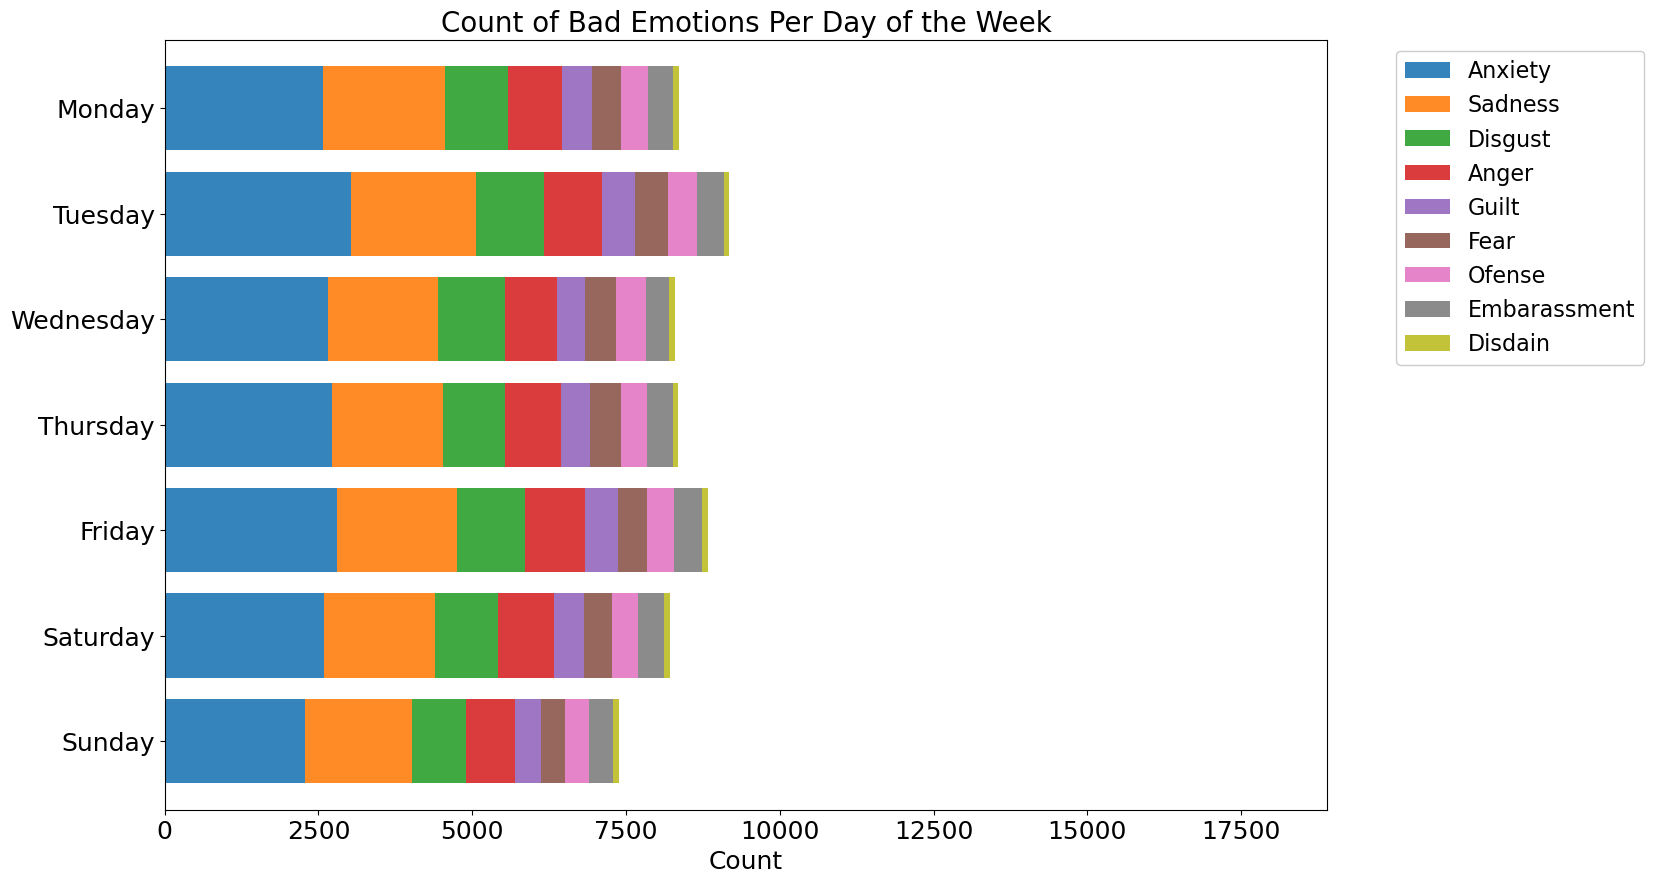

In [598]:
fig2, ax2 = plt.subplots(figsize=(15, 10)) 

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ordered_bad_emotions_day.plot(kind='barh', ax= ax2, alpha=0.9, stacked=True, width=0.8)  
plt.title('Count of Bad Emotions Per Day of the Week', fontsize=20)
plt.xlabel('Count', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(range(len(days_of_week)), days_of_week, fontsize=18)
plt.ylabel('')
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=1)

plt.gca().invert_yaxis()

In [582]:
ordered_good_columns = day_emotion_counts[good].iloc[-1].sort_values(ascending=False).index

In [583]:
ordered_good_columns

Index(['Joy', 'Satisfaction', 'Love', 'Alertness', 'Hope', 'Amusement',
       'Pride', 'Gratitude', 'Awe'],
      dtype='object')

In [584]:
ordered_good_emotions_day = day_emotion_counts[ordered_good_columns]

In [585]:
ordered_good_emotions_day

,Joy,Satisfaction,Love,Alertness,Hope,Amusement,Pride,Gratitude,Awe
Day,,,,,,,,,
1.0,3470.0,2645.0,2823.0,2273.0,2191.0,1533.0,1214.0,1082.0,569.0
2.0,3333.0,2718.0,2837.0,2810.0,2509.0,1552.0,1315.0,1004.0,531.0
3.0,2986.0,2531.0,2365.0,2526.0,2269.0,1445.0,1269.0,989.0,493.0
4.0,3060.0,2469.0,2485.0,2591.0,2352.0,1463.0,1201.0,991.0,530.0
5.0,3107.0,2682.0,2515.0,2679.0,2392.0,1550.0,1315.0,1039.0,532.0
6.0,3387.0,2605.0,2421.0,2424.0,2305.0,1615.0,1294.0,1013.0,491.0
7.0,3380.0,2561.0,2554.0,2084.0,2078.0,1605.0,1293.0,1024.0,558.0


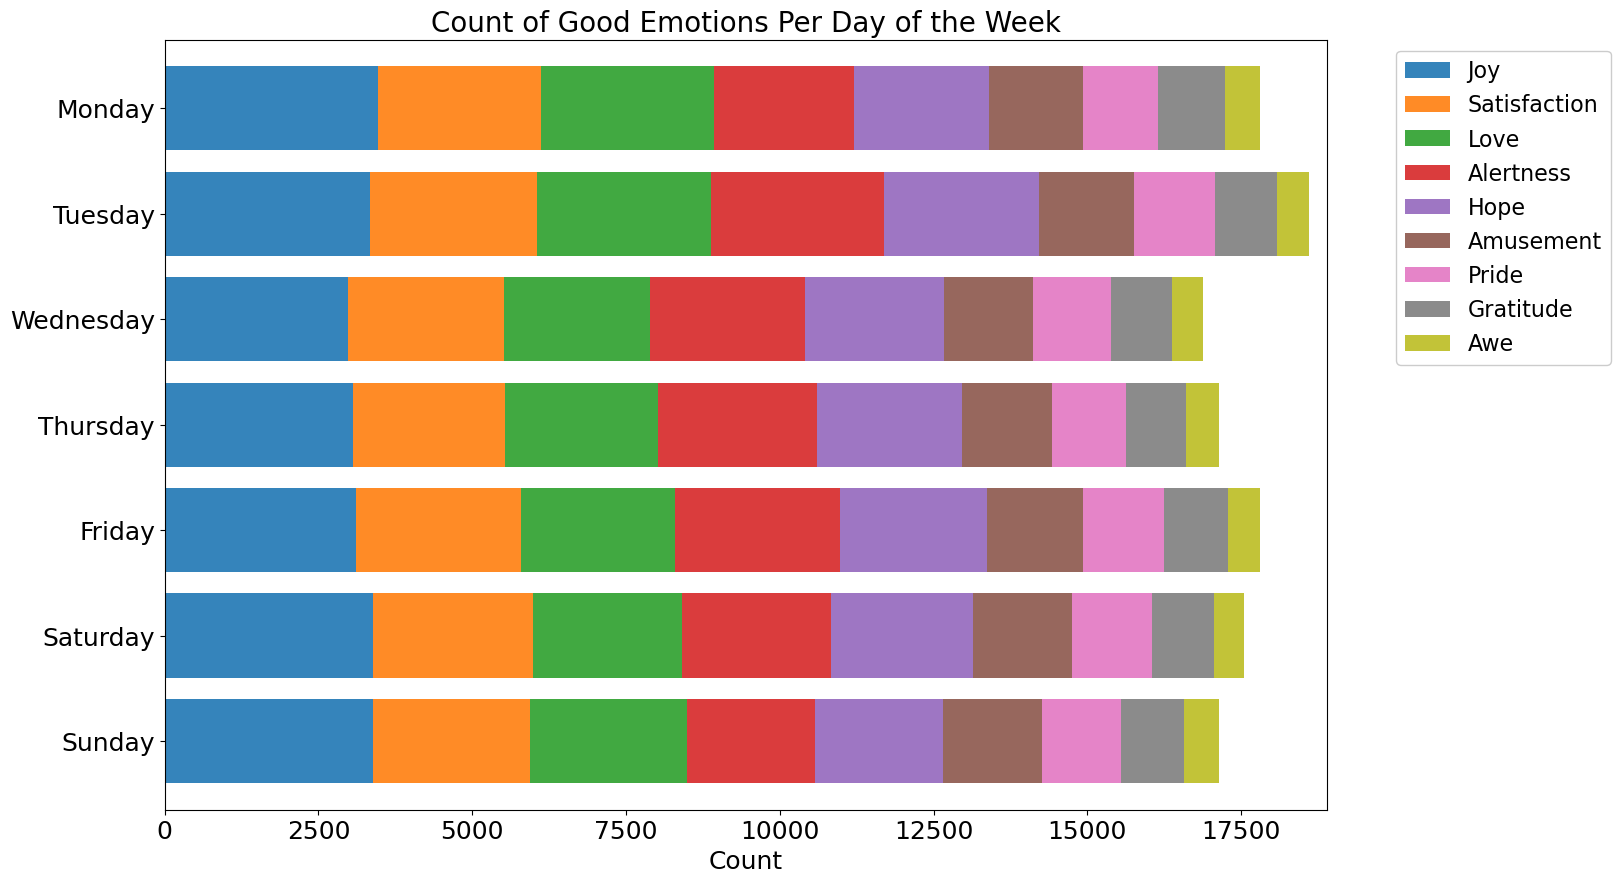

In [597]:
fig3, ax3 = plt.subplots(figsize=(15, 10)) 

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ordered_good_emotions_day.plot(kind='barh', ax= ax3, alpha=0.9, stacked=True, width=0.8)  
plt.title('Count of Good Emotions Per Day of the Week', fontsize=20)
plt.xlabel('Count', fontsize=18)
plt.xticks(fontsize=18)
plt.xlim(0, 18900)
plt.yticks(range(len(days_of_week)), days_of_week, fontsize=18)
plt.ylabel('')

plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=1)

plt.gca().invert_yaxis()

## emotion freq per day 

In [601]:
# Sum the values of each emotion per day

emotions_sum_per_day = df_reduced.groupby('Day')[emotion_cols].sum()

# Calculate the total number of observations per day
total_observations_per_day = df_reduced.groupby('Day')[emotion_cols].count()

# Calculate the frequency (percentage) of each emotion per day
emotion_frequency_per_day = emotions_sum_per_day / total_observations_per_day * 100

In [602]:
emotion_frequency_per_day

,Pride,Love,Hope,Gratitude,Joy,Satisfaction,Awe,Amusement,Alertness,Anxiety,Disdain,Ofense,Guilt,Disgust,Fear,Embarassment,Sadness,Anger
Day,,,,,,,,,,,,,,,,,,
1.0,12.511594,29.094095,22.580645,11.151190,35.762135,27.259610,5.864166,15.799237,23.425745,26.558796,0.906936,4.627435,5.008760,10.491601,4.864475,4.184273,20.447284,9.028136
2.0,12.731145,27.466357,24.290832,9.720205,32.268371,26.314261,5.140866,15.025656,27.204957,29.354245,0.851970,4.492206,5.198954,10.620583,5.208636,4.308258,19.711492,9.129635
3.0,13.714471,25.559278,24.521777,10.688425,32.270615,27.353291,5.328002,15.616557,27.299254,28.725819,1.145574,5.101048,4.971361,11.801578,5.457689,4.095969,19.226197,9.197017
4.0,12.844920,26.577540,25.155080,10.598930,32.727273,26.406417,5.668449,15.647059,27.711230,29.037433,0.951872,4.598930,5.101604,10.684492,5.272727,4.427807,19.422460,9.764706
5.0,13.367897,25.566738,24.316357,10.562163,31.584833,27.264410,5.408153,15.756836,27.233913,28.494460,0.975907,4.462743,5.428484,11.222934,4.899868,4.594897,19.782454,9.911558
6.0,13.703272,25.638039,24.409616,10.727523,35.867839,27.586572,5.199619,17.102616,25.669808,27.353595,1.027216,4.479509,5.061951,10.854601,4.966642,4.479509,19.199407,9.636768
7.0,14.615124,28.868543,23.488188,11.574545,38.205041,28.947666,6.307223,18.141743,23.556008,25.760145,1.085114,4.408274,4.758675,9.879055,4.521307,4.351758,19.701594,8.963490


In [603]:
ordered_bad_columns_freq = emotion_frequency_per_day[bad].iloc[-1].sort_values(ascending=False).index

ordered_bad_emotions_day_freq = emotion_frequency_per_day[ordered_bad_columns_freq]

In [604]:
ordered_bad_emotions_day_freq

,Anxiety,Sadness,Disgust,Anger,Guilt,Fear,Ofense,Embarassment,Disdain
Day,,,,,,,,,
1.0,26.558796,20.447284,10.491601,9.028136,5.008760,4.864475,4.627435,4.184273,0.906936
2.0,29.354245,19.711492,10.620583,9.129635,5.198954,5.208636,4.492206,4.308258,0.851970
3.0,28.725819,19.226197,11.801578,9.197017,4.971361,5.457689,5.101048,4.095969,1.145574
4.0,29.037433,19.422460,10.684492,9.764706,5.101604,5.272727,4.598930,4.427807,0.951872
5.0,28.494460,19.782454,11.222934,9.911558,5.428484,4.899868,4.462743,4.594897,0.975907
6.0,27.353595,19.199407,10.854601,9.636768,5.061951,4.966642,4.479509,4.479509,1.027216
7.0,25.760145,19.701594,9.879055,8.963490,4.758675,4.521307,4.408274,4.351758,1.085114


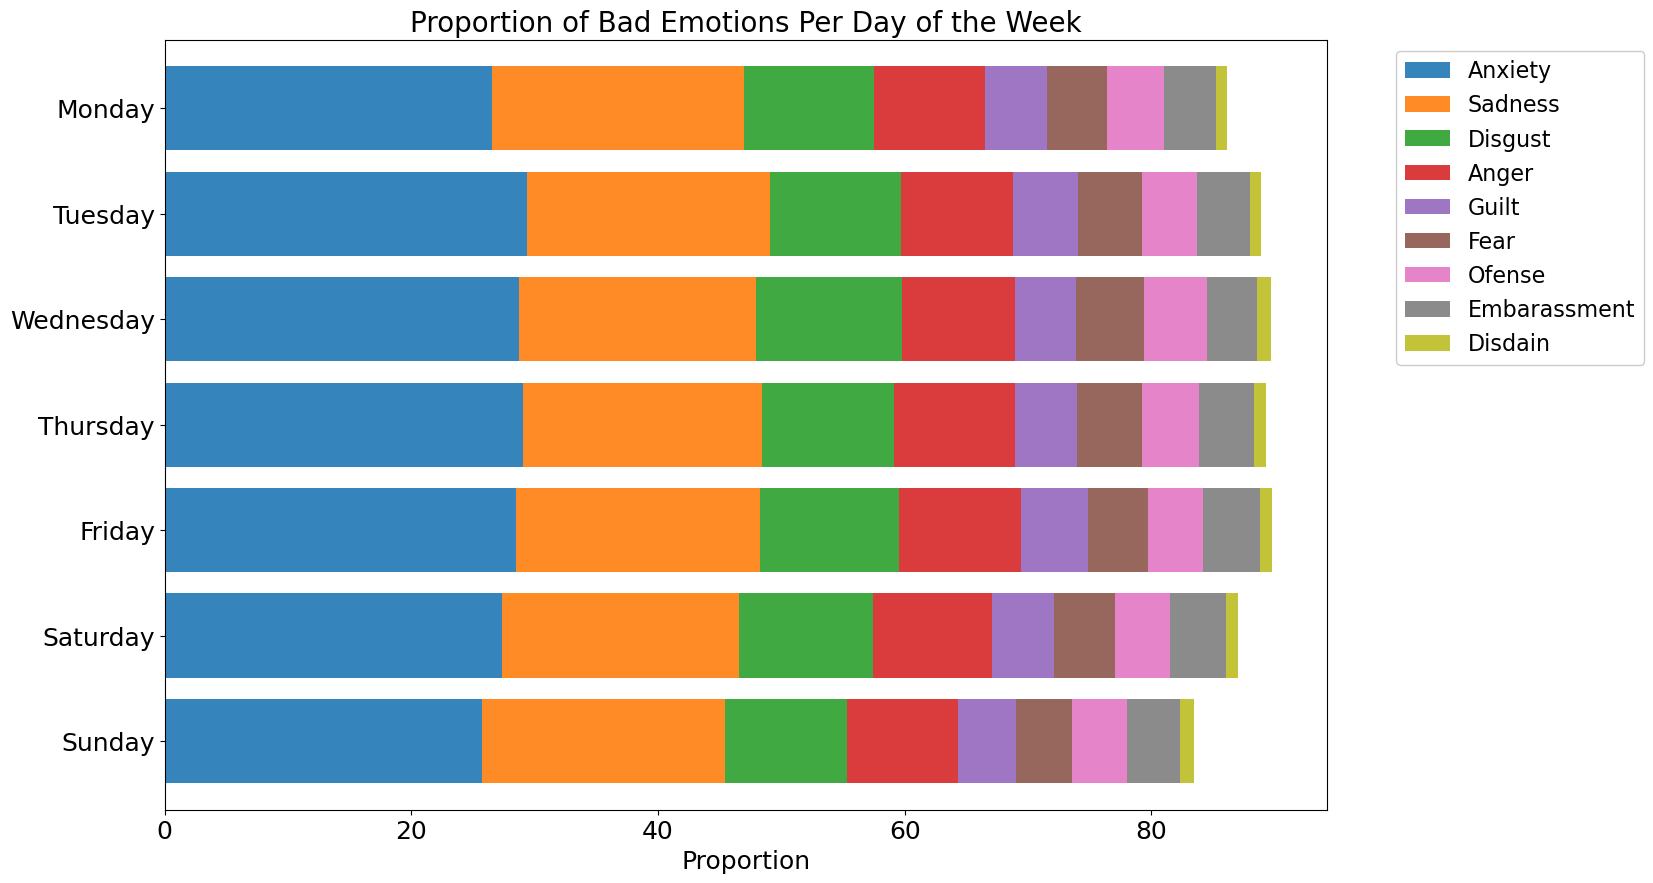

In [615]:
fig4, ax4 = plt.subplots(figsize=(15, 10)) 

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ordered_bad_emotions_day_freq.plot(kind='barh', ax= ax4, alpha=0.9, stacked=True, width=0.8)  
plt.title('Proportion of Bad Emotions Per Day of the Week', fontsize=20)
plt.xlabel('Proportion', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(range(len(days_of_week)), days_of_week, fontsize=18)
plt.ylabel('')
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=1)

plt.savefig('proportion_bad_emotions_peer_day_plot.png', bbox_inches='tight')

plt.gca().invert_yaxis()

In [608]:
ordered_good_columns_freq = emotion_frequency_per_day[good].iloc[-1].sort_values(ascending=False).index

ordered_good_emotions_day_freq = emotion_frequency_per_day[ordered_good_columns_freq]

In [609]:
ordered_good_emotions_day_freq

,Joy,Satisfaction,Love,Alertness,Hope,Amusement,Pride,Gratitude,Awe
Day,,,,,,,,,
1.0,35.762135,27.259610,29.094095,23.425745,22.580645,15.799237,12.511594,11.151190,5.864166
2.0,32.268371,26.314261,27.466357,27.204957,24.290832,15.025656,12.731145,9.720205,5.140866
3.0,32.270615,27.353291,25.559278,27.299254,24.521777,15.616557,13.714471,10.688425,5.328002
4.0,32.727273,26.406417,26.577540,27.711230,25.155080,15.647059,12.844920,10.598930,5.668449
5.0,31.584833,27.264410,25.566738,27.233913,24.316357,15.756836,13.367897,10.562163,5.408153
6.0,35.867839,27.586572,25.638039,25.669808,24.409616,17.102616,13.703272,10.727523,5.199619
7.0,38.205041,28.947666,28.868543,23.556008,23.488188,18.141743,14.615124,11.574545,6.307223


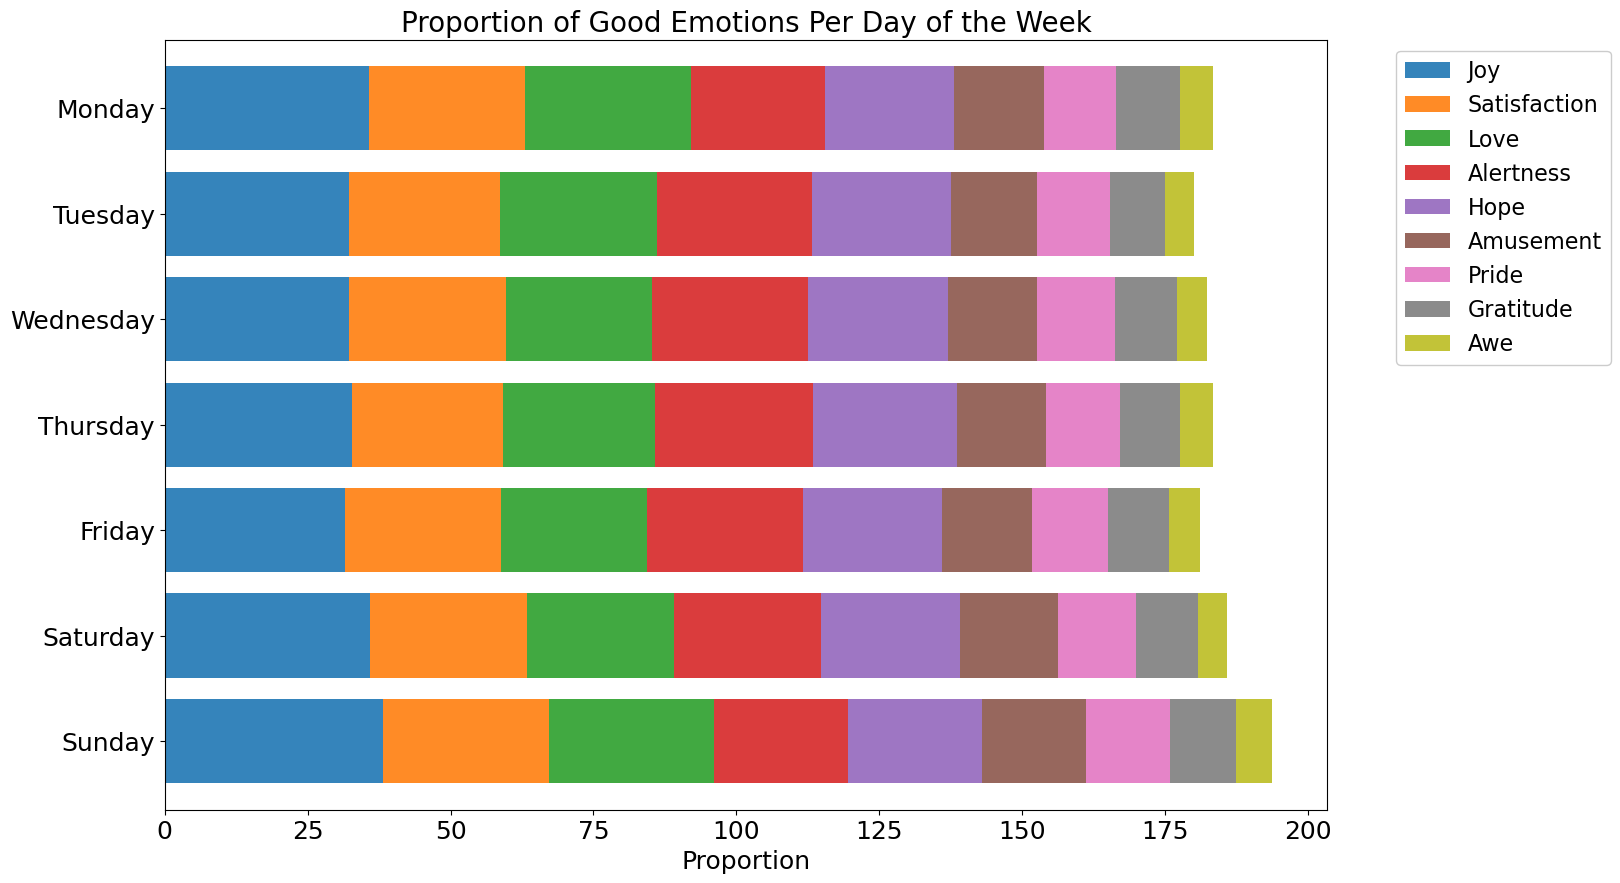

In [614]:
fig5, ax5 = plt.subplots(figsize=(15, 10)) 

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ordered_good_emotions_day_freq.plot(kind='barh', ax= ax5, alpha=0.9, stacked=True, width=0.8)  
plt.title('Proportion of Good Emotions Per Day of the Week', fontsize=20)
plt.xlabel('Proportion', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(range(len(days_of_week)), days_of_week, fontsize=18)
plt.ylabel('')
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=1)

plt.gca().invert_yaxis()

plt.savefig('proportion_good_emotions_peer_day_plot.png', bbox_inches='tight')

In [613]:
df_reduced['Day'].nunique()

7